In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

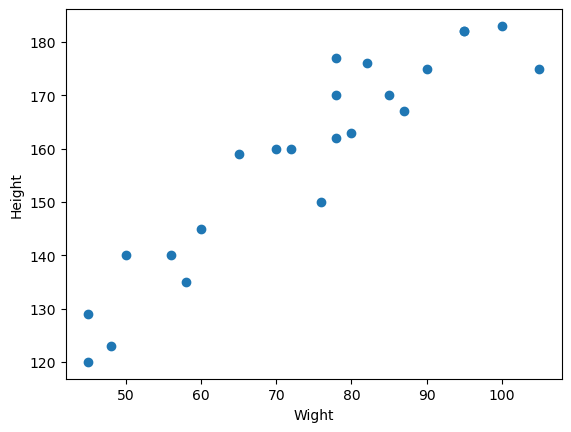

In [4]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Wight')
plt.ylabel('Height')

### Steps in building a Model
1. Load the Dataset
2. Divide the features based on independent and dependent features
3. Train Test Split of Dataset
4. Standardize the dataset
5. Training the model using Linear Regression

In [7]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


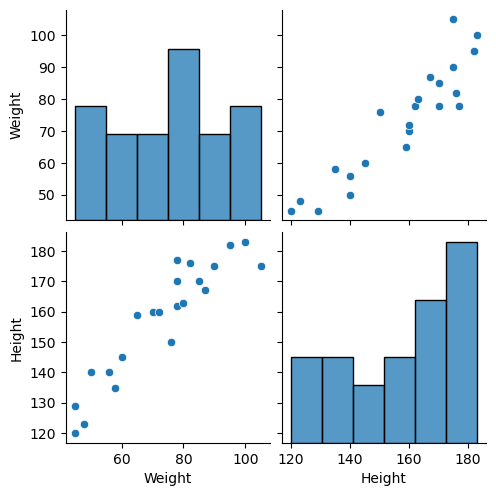

In [8]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [9]:
## Independent and Dependent Features
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [10]:
X=df[['Weight']]  ## Independent vairbales we must keep it in dataframe format (two dim) 
y=df['Height']    ## Dependent variable we can keep it in series (one dim)

In [11]:
print(X.shape,y.shape)

(23, 1) (23,)


### Train Test Split
* we need to split the data into two sets to apply our model, one is train and another one is train_test_split
* so when we do that on both X and y, we can train and test our model performance

In [13]:
### Train test split
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

In [14]:
X_train.shape

(18, 1)

In [15]:
x_test.shape

(5, 1)

In [16]:
y_train.shape

(18,)

In [17]:
y_test.shape

(5,)

### Standardization
* Standardization is required to perform to convert the data into single scale, To compare two fields we need them to be in same scale.
* Where weight is in Kgs and heigt is in feets, so to bring both into single scale we use standardization.

In [18]:
### Standardization

from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler()   

 * Here the data gets transformed based on Z_Score where mean = 0 and std_dev = 1

In [20]:
X_train = scalar.fit_transform(X_train)  

* In test data we use transform, not fit_transform. Because we want to use the same tranformation of training data. To avoid data leakage

In [21]:
X_test = scalar.transform(x_test)

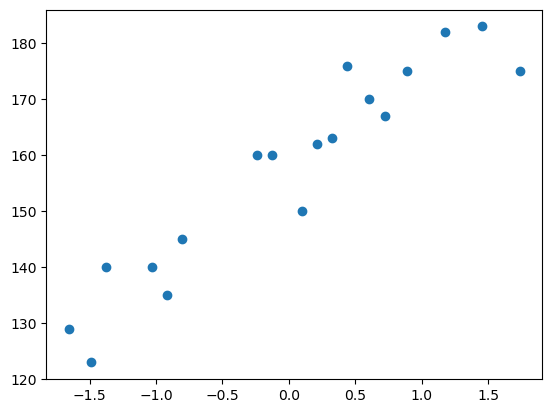

In [23]:
plt.scatter(X_train,y_train)

### Apply Linear Regression Model


In [24]:
# Calling the model
from sklearn.linear_model import LinearRegression

In [26]:
# assigning the model to a variable
regression = LinearRegression()

In [27]:
# applying the model to our x_train and y_train
regression.fit(X_train,y_train)

LinearRegression()

In [29]:
# looking for the coefficient (the slope of the line)
print(f'The slope or coefficient of weight is: {regression.coef_}')

The slope or coefficient of weight is: [17.03440872]


In [30]:
# looking for the intercept
print(f'The intercept is: {regression.intercept_}')

The intercept is: 157.5


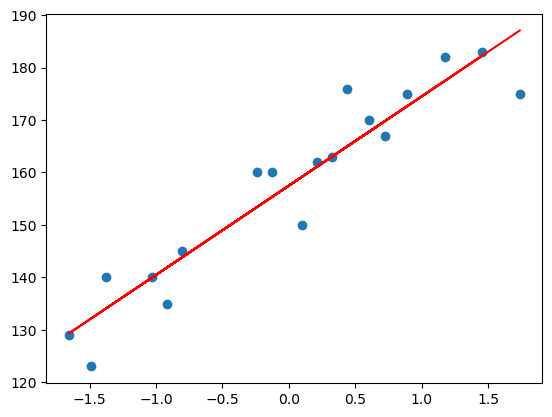

In [31]:
## plot training data best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

### Prediction of train data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)
   
### Prediction for test data
1. predicted height output = incercept + coef (Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [32]:

y_pred_test = regression.predict(X_test)

In [33]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

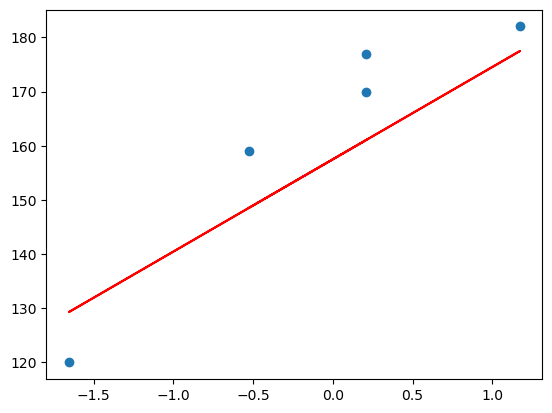

In [34]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,'r')

### Performance Metrics


In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


### R square
Formula

#### R^2 = 1-SSR/SST
R^2 = Coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [38]:
from sklearn.metrics import r2_score


In [39]:
score = r2_score(y_test,y_pred_test)
print(score)

0.7769869860423441


* the mentioned R^2 tells the how good our model performed
* MSE/MAE/RMSE tells how much avg error/mistakes our model done.

### Adjusted R^2 = [(1-R^2)*(n-1)/(n-k-1)]
where:
R^2: The R^2 of the model n: The no of observations, k: The no of predictor variables

In [41]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [43]:
regression

LinearRegression()

In [44]:
## new data point weight is 80

scaled_weight = scalar.transform([[80]])
scaled_weight

C:\Users\RAMMAN INFOTECH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [52]:
print(f'The height prediction for weight 80kgs is: {regression.predict([scaled_weight[0]])}')

The height prediction for weight 80kgs is: [163.01076266]


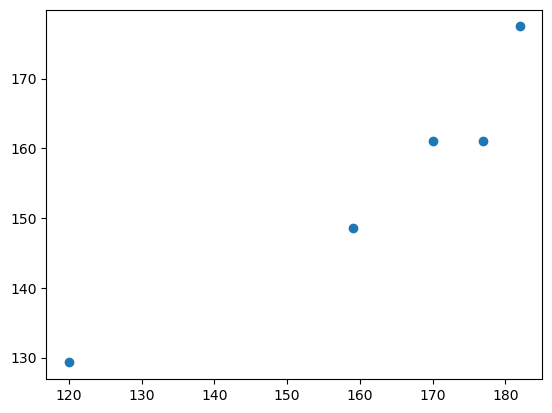

In [53]:
### Assumptions
## Plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [54]:
## Residuals 
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\RAMMAN INFOTECH\AppData\Local\Temp\ipykernel_5404\1166138025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

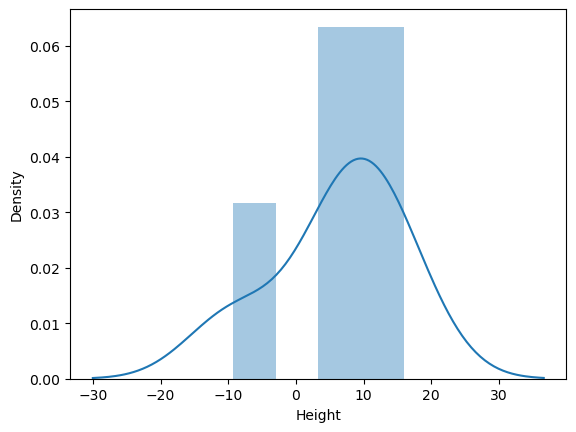

In [58]:
## Plot the residuals
sns.distplot(residuals,kde=True)

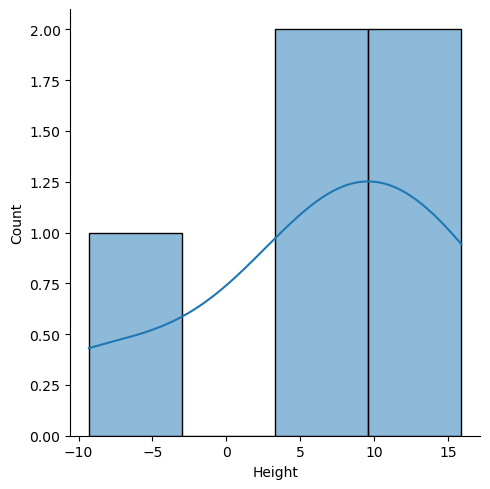

In [59]:
sns.displot(residuals,kde=True)

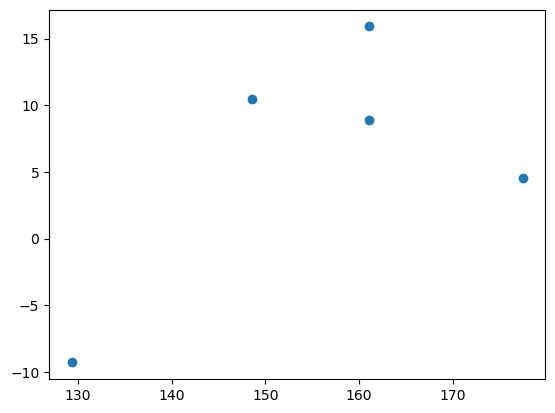

In [60]:
## Scatter plot with respect to prediction and residuals
## Uniform Distribution
plt.scatter(y_pred_test,residuals)

### OLS Linear Regression

In [61]:
import statsmodels.api as sm

In [62]:
model = sm.OLS(y_train,X_train).fit()

In [63]:
prediction = model.predict(X_test)

In [64]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Tue, 14 Jan 2025   Prob (F-statistic):                       0.661
Time:                        21:24:35   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\RAMMAN INFOTECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [65]:
#### Prediction for new data
regression.predict([[80]])

array([1520.25269753])

In [66]:
regression.predict(scalar.transform([[80]]))

C:\Users\RAMMAN INFOTECH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([163.01076266])